# MHKiT WEC-Sim Example
The following example runs an application of the [MHKiT wave module](https://mhkit-software.github.io/MHKiT/mhkit-python/api.wave.html) to:

 1. Load WEC-Sim Simulated Data
 2. Wave Class
 3. Body Class
 4. PTO Class
 5. Constraint Class
 6. Mooring Class
 7. MoorDyn Class

Start by importing the necessary python packages and MHKiT module.

In [1]:
import mhkit
import scipy.io as sio
import matplotlib.pyplot as plt

## Load WEC-Sim Simulated Data
Three different types of WEC-Sim simulated data are provided, we will use the WEC-Sim run with Mooring for this example.

In [2]:
## no Mooring
# file_name = './data/wave/RM3_matlabWorkspace_structure.mat'
# ws_output = mhkit.wave.io.wecsim.read_output(file_name)

## with Mooring
# file_name = './data/wave/RM3MooringMatrix_matlabWorkspace_structure.mat'
# ws_output = mhkit.wave.io.wecsim.read_output(file_name)

## with moorDyn
file_name = './data/wave/RM3MoorDyn_matlabWorkspace_structure.mat'
ws_output = mhkit.wave.io.wecsim.read_output(file_name)

# Display output keys
ws_output.keys()

ptosim class not used


dict_keys(['wave', 'bodies', 'ptos', 'constraints', 'mooring', 'moorDyn', 'ptosim'])

## Wave Class
Output from WEC-Sim's Wave Class includes relevant information about the wave input, including the wave elevation as a function of time, and the wave type. 

In [3]:
# Save Wave Class output from WEC-Sim to a new dataFrame, called `wave`
wave = ws_output['wave']

# Display WEC-Sim wave type
display(wave.name)

# View WEC-Sim Wave Class output
wave.head()

'etaImport'

,elevation
time,
0.00,-0.000000e+00
0.01,-2.766568e-07
0.02,-1.106006e-06
0.03,-2.486738e-06
0.04,-4.416811e-06


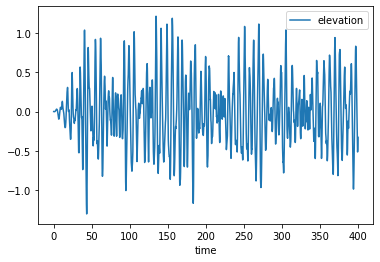

In [4]:
# Plot WEC-Sim Wave Class output
wave.plot()

## Body Class
Output from WEC-Sim's Body Class includes relevant information about each body, including the body's position, velocity, acceleration, forces acting on the body, and the body's name. 

In [5]:
# Save Body Class output from WEC-Sim to a new dataFrame, called `bodies`
bodies = ws_output['bodies']
bodies.keys()

dict_keys(['body1', 'body2'])

### WEC-Sim Output for Body 1

In [6]:
# Display name of Body 1
display(bodies['body1'].name)

# Display WEC-Sim output data for Body 1 
display(bodies['body1'].keys())

'float'

Index(['position_dof1', 'velocity_dof1', 'acceleration_dof1',
       'forceTotal_dof1', 'forceExcitation_dof1', 'forceRadiationDamping_dof1',
       'forceAddedMass_dof1', 'forceRestoring_dof1',
       'forceMorrisonAndViscous_dof1', 'forceLinearDamping_dof1',
       'position_dof2', 'velocity_dof2', 'acceleration_dof2',
       'forceTotal_dof2', 'forceExcitation_dof2', 'forceRadiationDamping_dof2',
       'forceAddedMass_dof2', 'forceRestoring_dof2',
       'forceMorrisonAndViscous_dof2', 'forceLinearDamping_dof2',
       'position_dof3', 'velocity_dof3', 'acceleration_dof3',
       'forceTotal_dof3', 'forceExcitation_dof3', 'forceRadiationDamping_dof3',
       'forceAddedMass_dof3', 'forceRestoring_dof3',
       'forceMorrisonAndViscous_dof3', 'forceLinearDamping_dof3',
       'position_dof4', 'velocity_dof4', 'acceleration_dof4',
       'forceTotal_dof4', 'forceExcitation_dof4', 'forceRadiationDamping_dof4',
       'forceAddedMass_dof4', 'forceRestoring_dof4',
       'forceMorrisonA

### Plot heave position data for Body 1

-0.09759007781599394

-1.3271724173517363

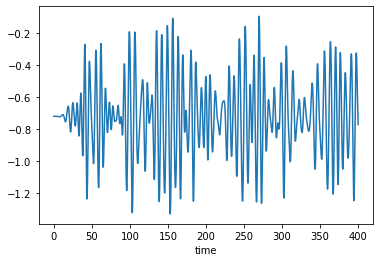

In [7]:
# Use Pandas to plot body1 position in heave
bodies['body1'].position_dof3.plot()

# Use Pandas to calculate the maximum and minimum heave position
display(bodies['body1'].position_dof3.max())
display(bodies['body1'].position_dof3.min())

### Plot all position data for Body 1

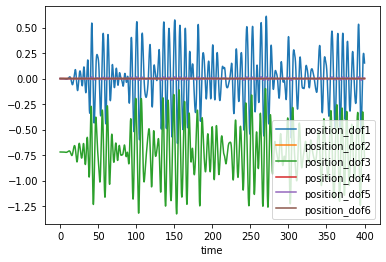

In [8]:
body1 = bodies['body1']
filter_col = [col for col in body1 if col.startswith('position')]
body1[filter_col].plot()

### WEC-Sim Output for Body 2

In [9]:
# Display name of Body 2
display(bodies['body2'].name)

# Display WEC-Sim output data for Body 2
display(bodies['body2'].keys())

'spar'

Index(['position_dof1', 'velocity_dof1', 'acceleration_dof1',
       'forceTotal_dof1', 'forceExcitation_dof1', 'forceRadiationDamping_dof1',
       'forceAddedMass_dof1', 'forceRestoring_dof1',
       'forceMorrisonAndViscous_dof1', 'forceLinearDamping_dof1',
       'position_dof2', 'velocity_dof2', 'acceleration_dof2',
       'forceTotal_dof2', 'forceExcitation_dof2', 'forceRadiationDamping_dof2',
       'forceAddedMass_dof2', 'forceRestoring_dof2',
       'forceMorrisonAndViscous_dof2', 'forceLinearDamping_dof2',
       'position_dof3', 'velocity_dof3', 'acceleration_dof3',
       'forceTotal_dof3', 'forceExcitation_dof3', 'forceRadiationDamping_dof3',
       'forceAddedMass_dof3', 'forceRestoring_dof3',
       'forceMorrisonAndViscous_dof3', 'forceLinearDamping_dof3',
       'position_dof4', 'velocity_dof4', 'acceleration_dof4',
       'forceTotal_dof4', 'forceExcitation_dof4', 'forceRadiationDamping_dof4',
       'forceAddedMass_dof4', 'forceRestoring_dof4',
       'forceMorrisonA

### Plot all heave data for Body 2

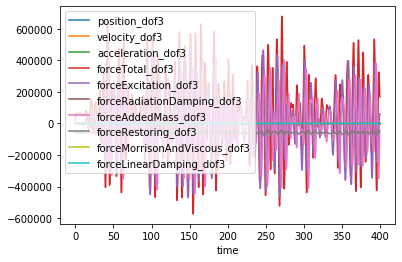

In [10]:
body2 = bodies['body2']
filter_col = [col for col in body2 if col.endswith('dof3')]
body2[filter_col].plot()

## PTO Class
Output from WEC-Sim's PTO Class includes relevant information about each pto, including the pto's position, velocity, acceleration, forces acting on the pto, and the pto's name. 

In [11]:
# Save PTO Class output from WEC-Sim to a new dataFrame, called `ptos`
ptos = ws_output['ptos']
ptos.head()

,position_dof1,velocity_dof1,acceleration_dof1,forceTotal_dof1,forceActuation_dof1,forceConstraint_dof1,forceInternalMechanics_dof1,powerInternalMechanics_dof1,position_dof2,velocity_dof2,...,forceInternalMechanics_dof5,powerInternalMechanics_dof5,position_dof6,velocity_dof6,acceleration_dof6,forceTotal_dof6,forceActuation_dof6,forceConstraint_dof6,forceInternalMechanics_dof6,powerInternalMechanics_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.0,0.0,0.0,-0.000816,0,-0.000816,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0,0.000000e+00,0.0,0.0
0.01,0.0,0.0,0.0,-10.117377,0,-10.117377,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.203132e-11,0,3.203132e-11,0.0,0.0
0.02,0.0,0.0,0.0,-8.083258,0,-8.083258,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.249102e-07,0,1.249102e-07,0.0,0.0
0.03,0.0,0.0,0.0,-7.343778,0,-7.343778,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.016699e-07,0,2.016699e-07,0.0,0.0
0.04,0.0,0.0,0.0,-8.223999,0,-8.223999,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.040977e-07,0,2.040977e-07,0.0,0.0


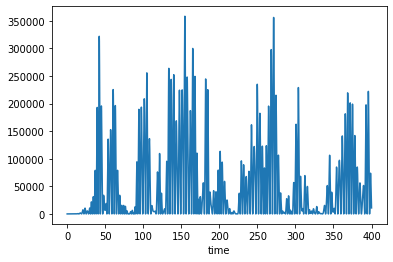

In [12]:
(-1*ptos.powerInternalMechanics_dof3).plot()

## Constraint Class
Output from WEC-Sim's Constraint Class includes relevant information about each pto, including the constraint's position, velocity, acceleration, forces acting on the constraint, and the constraint's name. 

In [13]:
# Save Constraint Class output from WEC-Sim to a new dataFrame, called `constraints`
constraints = ws_output['constraints']
constraints.head()

,position_dof1,velocity_dof1,acceleration_dof1,forceConstraint_dof1,position_dof2,velocity_dof2,acceleration_dof2,forceConstraint_dof2,position_dof3,velocity_dof3,...,acceleration_dof4,forceConstraint_dof4,position_dof5,velocity_dof5,acceleration_dof5,forceConstraint_dof5,position_dof6,velocity_dof6,acceleration_dof6,forceConstraint_dof6
time,,,,,,,,,,,,,,,,,,,,,
0.00,0.000000e+00,0.000000e+00,-2.382255e-10,0.0,0.0,0.0,0.0,-1.615587e-27,0.000000e+00,0.000000,...,0.0,-3.635975,-0.000000e+00,-0.000000e+00,-1.282689e-11,-0.0,0.0,0.0,0.0,7.703720e-34
0.01,-7.759426e-14,-1.900049e-11,-2.912604e-06,0.0,0.0,0.0,0.0,1.198363e-03,1.828372e-07,0.000039,...,0.0,-3.325131,-4.349218e-15,-1.064979e-12,-1.003877e-07,-0.0,0.0,0.0,0.0,3.168962e-05
0.02,-2.368225e-10,-5.339197e-08,-6.756118e-06,0.0,0.0,0.0,0.0,2.253082e-04,6.240875e-07,0.000047,...,0.0,-3.573245,-7.522913e-12,-1.668567e-09,-2.075588e-07,-0.0,0.0,0.0,0.0,6.556519e-06
0.03,-1.173335e-09,-1.392404e-07,-1.018120e-05,0.0,0.0,0.0,0.0,-3.574007e-04,1.105935e-06,0.000048,...,0.0,-3.721941,-3.532536e-11,-3.968850e-09,-2.621098e-07,-0.0,0.0,0.0,0.0,-8.496401e-06
0.04,-3.111702e-09,-2.522872e-07,-1.273564e-05,0.0,0.0,0.0,0.0,-4.612044e-04,1.573698e-06,0.000045,...,0.0,-3.749198,-8.722268e-11,-6.377502e-09,-2.511870e-07,-0.0,0.0,0.0,0.0,-1.125421e-05


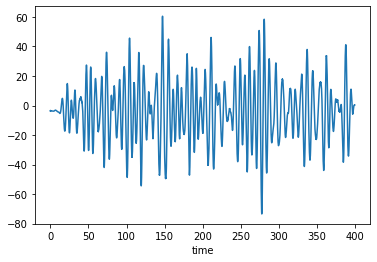

In [14]:
constraints['forceConstraint_dof4'].plot()

## Mooring Class

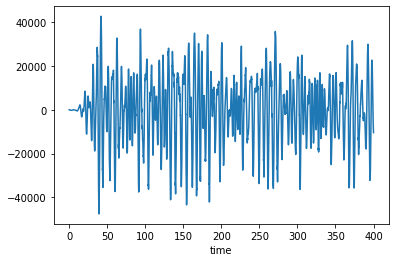

In [15]:
if len(ws_output['mooring']) > 0:
    ws_output['mooring'].head()
    mooring = ws_output['mooring']
    mooring.forceMooring_dof1.plot()
else:
    print("no mooring used") 

## MoorDyn Class

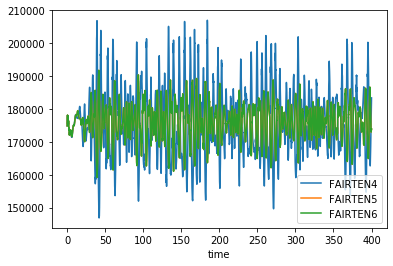

In [16]:
if len(ws_output['moorDyn']) > 0:
    ws_output['moorDyn']['Lines'].head()
    moorDyn = ws_output['moorDyn']
    moorDyn['Lines'].plot()

else:
    print("moorDyn not used") 

# Run MHKiT Wave Module

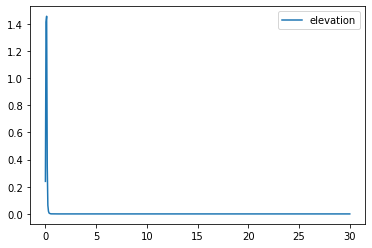

In [17]:
# Calculate wave spectrum from WEC-Sim elevation data
ws_spectrum = mhkit.wave.resource.elevation_spectrum(wave,60,1000)

# Plot calcualed wave Spectrum
ws_spectrum.plot()

In [18]:
# Calcualte Peak Wave Period (Tp) and Significant Wave Height(Hm0)
Tp = mhkit.wave.resource.peak_period(ws_spectrum)
Hm0 = mhkit.wave.resource.significant_wave_height(ws_spectrum)

display(Tp)
display(Hm0)

,Tp
elevation,8.333333


,Hm0
elevation,1.785851
